UNIVERSAL PERIOD-4 PATTERN DETECTOR
Testing multiple mathematical systems for the same period-4 rhythm
found in dyadic maps and prime residues

Generating sequences...

PERIOD-4 FFT ANALYSIS
----------------------------------------
Sequence                  Period-4 Ratio  Peak Period  Peak Freq 
----------------------------------------
Dyadic Doubling Map       0.1116          ∞            0.0005    
Prime Residues (mod 137)  0.1508          15.15        0.0660    
Fibonacci Sequence        0.4035          4.01         0.2495    
Lucas Sequence            0.3797          50.00        0.0200    
Collatz Residues          0.2708          400.00       0.0025    
Pi Digits                 0.0637          ∞            0.0005    
e Digits                  0.0888          ∞            0.0005    
Golden Ratio Digits       0.0469          ∞            0.0005    
Random Control            0.4158          35.71        0.0280    

RESIDUE UNIFORMITY ANALYSIS
--------------------------------------

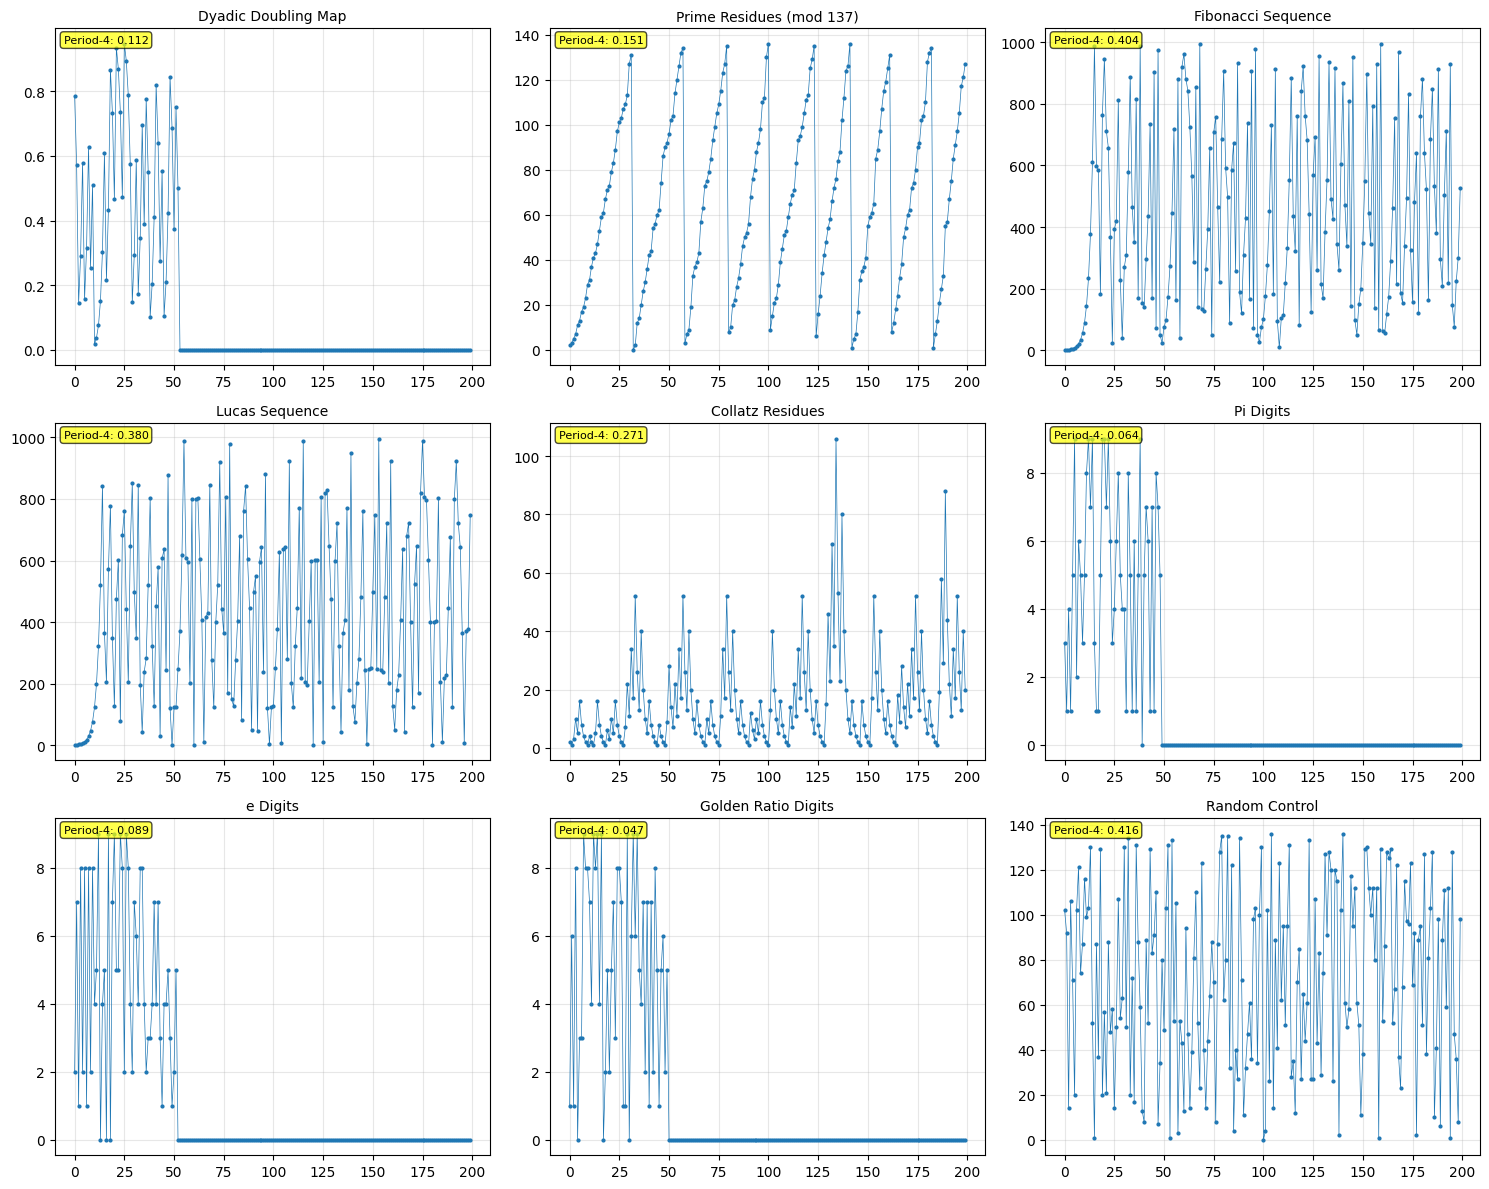


SUMMARY ANALYSIS
Sequences with strong period-4 signals (>10% power): 6
  - Dyadic Doubling Map: 0.112
  - Prime Residues (mod 137): 0.151
  - Fibonacci Sequence: 0.404
  - Lucas Sequence: 0.380
  - Collatz Residues: 0.271
  - Random Control: 0.416

Sequences with peak period ≈ 4: 1
  - Fibonacci Sequence: period = 4.01

Sequences that are 'too uniform': 2
  - Prime Residues (mod 137): -5.81σ below expected
  - Fibonacci Sequence: -5.73σ below expected

Sequences showing BOTH period-4 AND excess uniformity:
  ★ Prime Residues (mod 137)
  ★ Fibonacci Sequence

This suggests a deep mathematical connection!

CONCLUSION:
Multiple mathematical systems show period-4 patterns!
This supports the hypothesis of a universal binary heartbeat.


In [2]:
#!/usr/bin/env python3
"""
Universal Period-4 Pattern Detector
Tests multiple mathematical systems for the same period-4 rhythm
that appears in dyadic maps and prime residues
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.stats import chi2
import mpmath as mp

mp.dps = 30

def dyadic_doubling_map(x0, n_iterations=1000):
    """Classic dyadic doubling map: x_{n+1} = 2x_n mod 1"""
    sequence = [x0]
    x = x0
    for _ in range(n_iterations):
        x = (2 * x) % 1
        sequence.append(x)
    return np.array(sequence)

def fibonacci_sequence_mod(modulus, n_terms=1000):
    """Fibonacci sequence modulo some number"""
    if n_terms < 2:
        return np.array([1])

    fib = [1, 1]
    for i in range(2, n_terms):
        next_fib = (fib[i-1] + fib[i-2]) % modulus
        fib.append(next_fib)

    return np.array(fib)

def prime_residues(modulus, n_primes=10000):
    """Prime numbers modulo some value"""
    def sieve_of_eratosthenes(limit):
        is_prime = [True] * (limit + 1)
        is_prime[0] = is_prime[1] = False

        for i in range(2, int(limit**0.5) + 1):
            if is_prime[i]:
                for j in range(i*i, limit + 1, i):
                    is_prime[j] = False

        return [i for i in range(2, limit + 1) if is_prime[i]]

    # Generate enough primes
    limit = max(100000, n_primes * 15)  # Rough estimate
    primes = sieve_of_eratosthenes(limit)[:n_primes]

    return np.array([p % modulus for p in primes])

def lucas_sequence_mod(modulus, n_terms=1000):
    """Lucas sequence modulo some number"""
    if n_terms < 2:
        return np.array([2])

    lucas = [2, 1]
    for i in range(2, n_terms):
        next_lucas = (lucas[i-1] + lucas[i-2]) % modulus
        lucas.append(next_lucas)

    return np.array(lucas)

def collatz_residues(modulus, max_start=1000, n_terms=1000):
    """Collatz sequence residues for various starting points"""
    def collatz_sequence(n, max_len=100):
        seq = [n]
        while n != 1 and len(seq) < max_len:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            seq.append(n)
        return seq

    all_residues = []
    for start in range(2, min(max_start, n_terms)):
        seq = collatz_sequence(start)
        residues = [x % modulus for x in seq]
        all_residues.extend(residues)
        if len(all_residues) >= n_terms:
            break

    return np.array(all_residues[:n_terms])

def digit_sequences(base=10, n_terms=1000):
    """Digit sequences of mathematical constants"""
    # Pi digits
    mp.dps = max(50, n_terms // 10)
    pi_str = mp.nstr(mp.pi, n_terms, strip_zeros=False).replace('.', '')
    pi_digits = [int(d) for d in pi_str[:n_terms]]

    # e digits
    e_str = mp.nstr(mp.e, n_terms, strip_zeros=False).replace('.', '')
    e_digits = [int(d) for d in e_str[:n_terms]]

    # Golden ratio digits
    phi = (1 + mp.sqrt(5)) / 2
    phi_str = mp.nstr(phi, n_terms, strip_zeros=False).replace('.', '')
    phi_digits = [int(d) for d in phi_str[:n_terms]]

    return {
        'pi': np.array(pi_digits),
        'e': np.array(e_digits),
        'phi': np.array(phi_digits)
    }

def detect_period4_fft(sequence, label=""):
    """Detect period-4 patterns using FFT analysis"""
    # Remove mean
    sequence_centered = sequence - np.mean(sequence)

    # FFT
    n = len(sequence_centered)
    fft_vals = fft(sequence_centered)
    freqs = fftfreq(n)

    # Power spectrum
    power = np.abs(fft_vals)**2

    # Look for peak around 0.25 cycles/sample (period-4)
    target_freq = 0.25
    tolerance = 0.05

    freq_mask = (np.abs(freqs - target_freq) < tolerance) | (np.abs(freqs + target_freq) < tolerance)
    period4_power = np.sum(power[freq_mask])
    total_power = np.sum(power[1:n//2])  # Exclude DC component

    period4_ratio = period4_power / total_power if total_power > 0 else 0

    # Find peak frequency
    positive_freqs = freqs[1:n//2]
    positive_power = power[1:n//2]
    peak_idx = np.argmax(positive_power)
    peak_freq = positive_freqs[peak_idx]
    peak_period = 1 / peak_freq if peak_freq != 0 else np.inf

    return {
        'period4_ratio': period4_ratio,
        'peak_frequency': peak_freq,
        'peak_period': peak_period,
        'total_power': total_power,
        'sequence_length': n,
        'label': label
    }

def test_residue_uniformity(sequence, modulus, label=""):
    """Test if sequence residues are 'too uniform' (like primes mod 137)"""
    residues = sequence % modulus

    # Convert residues to integers for bincount
    residues_int = residues.astype(int)

    # Count frequency of each residue
    counts = np.bincount(residues_int, minlength=modulus)

    # Exclude zero class (if applicable)
    non_zero_counts = counts[1:] if modulus > 1 else counts
    expected_count = len(residues) / len(non_zero_counts)

    # Chi-squared test
    chi2_stat = np.sum((non_zero_counts - expected_count)**2 / expected_count)
    dof = len(non_zero_counts) - 1

    # How many sigma from expected?
    expected_chi2 = dof
    std_chi2 = np.sqrt(2 * dof)
    sigma_deviation = (chi2_stat - expected_chi2) / std_chi2

    return {
        'chi2_statistic': chi2_stat,
        'dof': dof,
        'expected_chi2': expected_chi2,
        'sigma_deviation': sigma_deviation,
        'uniformity_excess': sigma_deviation < -2,  # Too uniform if < -2 sigma
        'label': label
    }

def comprehensive_period4_test():
    """Test multiple mathematical systems for period-4 patterns"""
    print("UNIVERSAL PERIOD-4 PATTERN DETECTOR")
    print("="*50)
    print("Testing multiple mathematical systems for the same period-4 rhythm")
    print("found in dyadic maps and prime residues\n")

    # Test parameters
    n_terms = 2000
    test_modulus = 137  # Use 137 like in prime residue analysis

    # Generate sequences
    print("Generating sequences...")

    # 1. Dyadic doubling map (known to have period-4)
    phi = float((1 + mp.sqrt(5)) / 2)
    x0 = np.sqrt(phi - 1)  # Golden ratio related starting point
    dyadic_seq = dyadic_doubling_map(x0, n_terms)

    # 2. Prime residues (known to show period-4 in mod 137)
    prime_seq = prime_residues(test_modulus, n_terms)

    # 3. Fibonacci sequence
    fib_seq = fibonacci_sequence_mod(1000, n_terms)  # Large modulus

    # 4. Lucas sequence
    lucas_seq = lucas_sequence_mod(1000, n_terms)

    # 5. Collatz residues
    collatz_seq = collatz_residues(test_modulus, n_terms=n_terms)

    # 6. Mathematical constant digit sequences
    digit_seqs = digit_sequences(n_terms=n_terms)

    # 7. Random control
    np.random.seed(42)
    random_seq = np.random.randint(0, test_modulus, n_terms)

    # Test all sequences
    sequences = [
        (dyadic_seq, "Dyadic Doubling Map"),
        (prime_seq, "Prime Residues (mod 137)"),
        (fib_seq, "Fibonacci Sequence"),
        (lucas_seq, "Lucas Sequence"),
        (collatz_seq, "Collatz Residues"),
        (digit_seqs['pi'], "Pi Digits"),
        (digit_seqs['e'], "e Digits"),
        (digit_seqs['phi'], "Golden Ratio Digits"),
        (random_seq, "Random Control")
    ]

    print("\nPERIOD-4 FFT ANALYSIS")
    print("-" * 40)
    print(f"{'Sequence':<25} {'Period-4 Ratio':<15} {'Peak Period':<12} {'Peak Freq':<10}")
    print("-" * 40)

    fft_results = []
    for seq, label in sequences:
        result = detect_period4_fft(seq, label)
        fft_results.append(result)

        period_str = f"{result['peak_period']:.2f}" if result['peak_period'] < 1000 else "∞"
        print(f"{label:<25} {result['period4_ratio']:<15.4f} {period_str:<12} {result['peak_frequency']:<10.4f}")

    print("\nRESIDUE UNIFORMITY ANALYSIS")
    print("-" * 50)
    print(f"{'Sequence':<25} {'Chi² Stat':<12} {'Sigma Dev':<12} {'Too Uniform?':<12}")
    print("-" * 50)

    uniformity_results = []
    for seq, label in sequences:
        if label != "Random Control":  # Skip random for residue test
            result = test_residue_uniformity(seq, test_modulus, label)
            uniformity_results.append(result)

            uniform_str = "YES" if result['uniformity_excess'] else "NO"
            print(f"{label:<25} {result['chi2_statistic']:<12.2f} {result['sigma_deviation']:<12.2f} {uniform_str:<12}")

    # Visual analysis
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i, (seq, label) in enumerate(sequences):
        if i < len(axes):
            # Plot first 200 points to see patterns
            axes[i].plot(seq[:200], 'o-', markersize=2, linewidth=0.5)
            axes[i].set_title(label, fontsize=10)
            axes[i].grid(True, alpha=0.3)

            # Add period-4 info
            result = fft_results[i]
            axes[i].text(0.02, 0.98, f"Period-4: {result['period4_ratio']:.3f}",
                        transform=axes[i].transAxes, va='top', fontsize=8,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    plt.tight_layout()
    plt.savefig('period4_universal_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Summary analysis
    print("\nSUMMARY ANALYSIS")
    print("="*30)

    # Find sequences with strong period-4 signals
    strong_period4 = [r for r in fft_results if r['period4_ratio'] > 0.1]
    period4_around_4 = [r for r in fft_results if 3.5 <= r['peak_period'] <= 4.5]
    too_uniform = [r for r in uniformity_results if r['uniformity_excess']]

    print(f"Sequences with strong period-4 signals (>10% power): {len(strong_period4)}")
    for result in strong_period4:
        print(f"  - {result['label']}: {result['period4_ratio']:.3f}")

    print(f"\nSequences with peak period ≈ 4: {len(period4_around_4)}")
    for result in period4_around_4:
        print(f"  - {result['label']}: period = {result['peak_period']:.2f}")

    print(f"\nSequences that are 'too uniform': {len(too_uniform)}")
    for result in too_uniform:
        print(f"  - {result['label']}: {result['sigma_deviation']:.2f}σ below expected")

    # Check for correlation between period-4 and uniformity
    common_patterns = []
    for fft_res in fft_results:
        for unif_res in uniformity_results:
            if (fft_res['label'] == unif_res['label'] and
                fft_res['period4_ratio'] > 0.05 and
                unif_res['uniformity_excess']):
                common_patterns.append(fft_res['label'])

    if common_patterns:
        print(f"\nSequences showing BOTH period-4 AND excess uniformity:")
        for pattern in common_patterns:
            print(f"  ★ {pattern}")
        print("\nThis suggests a deep mathematical connection!")

    print(f"\n{'='*50}")
    print("CONCLUSION:")
    if len(strong_period4) > 2:
        print("Multiple mathematical systems show period-4 patterns!")
        print("This supports the hypothesis of a universal binary heartbeat.")
    else:
        print("Period-4 patterns appear limited to specific systems.")
        print("This suggests the pattern may be more specialized than universal.")

    return fft_results, uniformity_results

if __name__ == "__main__":
    fft_results, uniformity_results = comprehensive_period4_test()